In [ ]:
# 학번: 20901     이름: 경승민

In [ ]:
# 코랩과 구글 드라이브 연동하기(데이터 셋 업로드)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 파일 읽어 들이기

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/gender_classification_v7.csv')

df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [ ]:
# 데이터 기초 정보 살펴보기

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [ ]:
# 상단 5개 데이터 살펴보기
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
# 데이터 통계치 살펴보기
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# 데이터 시각화1: 성별 인원수 계산하기

df['gender'].value_counts()

,count
gender,
Female,2501
Male,2500


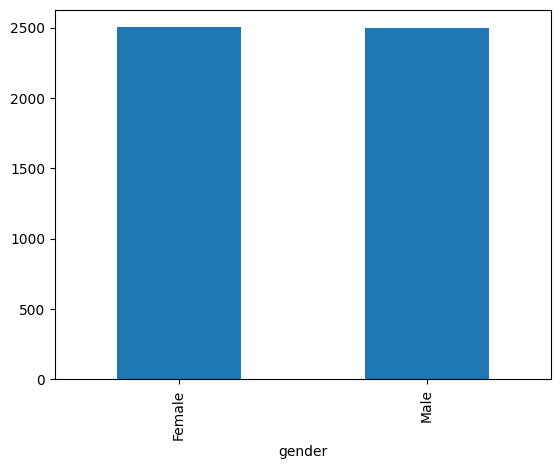

In [ ]:
# 성별 인원수 막대그래프

import matplotlib.pyplot as plt
df['gender'].value_counts().plot.bar()
plt.show()

In [ ]:
# 데이터 시각화2: 성별 머리카락 길이 비교하기(그룹화 하여 평균 출력)

long_hair_count = df['long_hair'].groupby(df['gender']).mean().round(2)
long_hair_count

,long_hair
gender,
Female,0.87
Male,0.87


/tmp/ipython-input-830842073.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(0,long_hair_count[0]+0.02, long_hair_count[0],va='center', ha='center')
/tmp/ipython-input-830842073.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(1,long_hair_count[1]+0.02, long_hair_count[1],va='center', ha='center')


Text(1, 0.89, '0.87')

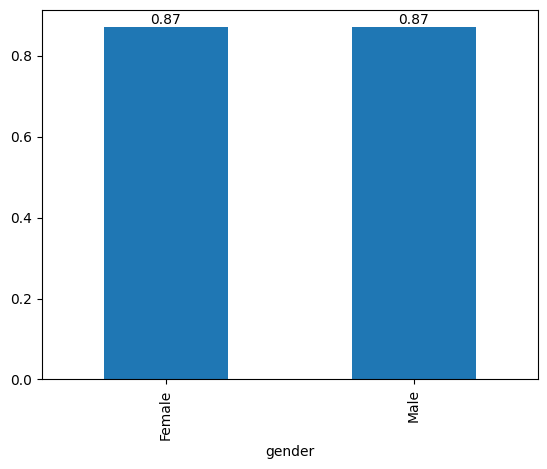

In [ ]:
# 머리카락 평균길이 막대그래프 표현

long_hair_count.plot.bar()
plt.text(0,long_hair_count[0]+0.02, long_hair_count[0],va='center', ha='center')
plt.text(1,long_hair_count[1]+0.02, long_hair_count[1],va='center', ha='center')

In [ ]:
# 상관 관계 분석하기 위한 원-핫 인코딩 - 속성 'gender'를 수치형으로 변환
df_onehot = pd.get_dummies(df,columns = ['gender'])
df_onehot


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender_Female,gender_Male
0,1,11.8,6.1,1,0,1,1,False,True
1,0,14.0,5.4,0,0,1,0,True,False
2,0,11.8,6.3,1,1,1,1,False,True
3,0,14.4,6.1,0,1,1,1,False,True
4,1,13.5,5.9,0,0,0,0,True,False
...,...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,True,False
4997,1,11.9,5.4,0,0,0,0,True,False
4998,1,12.9,5.7,0,0,0,0,True,False
4999,1,13.2,6.2,0,0,0,0,True,False


In [ ]:
# 원-핫 인코딩 다시 해서 첫 번째 속성 삭제
df_onehot = pd.get_dummies(df,columns = ['gender'],drop_first=True)
df_onehot


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender_Male
0,1,11.8,6.1,1,0,1,1,True
1,0,14.0,5.4,0,0,1,0,False
2,0,11.8,6.3,1,1,1,1,True
3,0,14.4,6.1,0,1,1,1,True
4,1,13.5,5.9,0,0,0,0,False
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,False
4997,1,11.9,5.4,0,0,0,0,False
4998,1,12.9,5.7,0,0,0,0,False
4999,1,13.2,6.2,0,0,0,0,False


In [ ]:
# 데이터 속성 간 상관관계 분석
corr = df_onehot.corr()
corr


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender_Male
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794,-0.010767
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328,0.334125
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292,0.277190
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303,0.758502
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794,0.744147
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312,0.743319
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000,0.754850
gender_Male,-0.010767,0.334125,0.277190,0.758502,0.744147,0.743319,0.754850,1.000000


In [ ]:
import seaborn as sns

plt.show()

In [ ]:
# 기계학습을 위해 독립변수(x)와 종속변수(y) 설정하기
x = df_onehot[['forehead_width_cm','forehead_height_cm','nose_wide','nose_long','lips_thin', 'distance_nose_to_lip_long']]
y = df_onehot[['gender_Male']]

display(x)
display(y)

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,11.8,6.1,1,0,1,1
1,14.0,5.4,0,0,1,0
2,11.8,6.3,1,1,1,1
3,14.4,6.1,0,1,1,1
4,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...
4996,13.6,5.1,0,0,0,0
4997,11.9,5.4,0,0,0,0
4998,12.9,5.7,0,0,0,0
4999,13.2,6.2,0,0,0,0


,gender_Male
0,True
1,False
2,True
3,True
4,False
...,...
4996,False
4997,False
4998,False
4999,False


In [ ]:
# 훈련 데이터 테스트 데이터 나누기(7:3비율)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
# 모델 생성하기 - 로지스틱 회귀 분류 모델
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()

In [ ]:
# 모델 학습하기 - 속성명 제거하고 값만 학습
LR_model.fit(X_train.values, y_train.values)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# 모델 평가하기
# 테스트 데이터로 결과 예측하기
predict_results = LR_model.predict(X_test.values)
predict_results

array([False,  True,  True, ...,  True,  True,  True])

In [ ]:
# 모델의 정확도 산출하기

from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict_results)

0.9640239840106596

In [ ]:
# 자신의 데이터로 성별 예측하기
import numpy as np
seungmin = np.array([[16.5, 5, 0, 0, 0, 0]])
LR_model.predict(seungmin)

array([False])

In [ ]:
# 새로운 데이터가 각 범주에 해당될 확률이 얼마나 되는지 출력
LR_model.predict_proba(seungmin)

array([[0.99660419, 0.00339581]])